# Create partial dataset
In actual experiments, we may want to take a subset of the data to estimate the functional connectivity. We may subset along the time axis, or the spatial dimension (x, y, z).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
from scipy import linalg
import seaborn as sns
import time

%matplotlib inline
%load_ext autoreload
%autoreload 2

import globals as glb
import plot_utils
from data_loader import RecordingData, SpontaneousRecordingData
from data_sampler import MissingTraceSampler, PartialSpontRecordingData


In [2]:
DATA_DIR = "../Data/"
spont_mat = scipy.io.loadmat(DATA_DIR + "dbspont.mat").get("db")[0]  # 9 datasets of recordings

SIDX = 0
spont0_fp = DATA_DIR + "_".join(["spont", spont_mat[SIDX][glb.SESSION_NAME][0], spont_mat[SIDX][glb.REC_DATE][0]])
spont_data0 = SpontaneousRecordingData(data_fp=spont0_fp)

spont_data0.display_field_shapes()

Removing 1 all-zero columns
neuron counts: 11983
layer counts: 9
Layer 0: 1131 neurons
Layer 1: 1183 neurons
Layer 2: 1218 neurons
Layer 3: 1321 neurons
Layer 4: 1415 neurons
Layer 5: 1471 neurons
Layer 6: 1418 neurons
Layer 7: 1440 neurons
Layer 8: 1386 neurons
timestamp counts 21054
running speed (21054, 1)
face motion mask (240, 320, 1000)
face motion svd (21054, 1000)
avg frame (240, 320)
pupil area (21054, 1)
pupil com (21054, 2)
eye motion svd (21054, 500)
whisker motion mask (216, 304, 500)
whisker motion SVD (21054, 500)


In [15]:
# subset the dataset in all three dimensions
# - select layer 0, 2, 3
# - consider only timestamp from 100 to 1000
# - consider horizontal region of ratio 0.1 - 0.3 w.r.t. the original plane
partial_spont0 = PartialSpontRecordingData(dataset=spont_data0, layers=[0,2,3], start_timepoint=100, end_timepoint=1000, 
                                           x_range=(0.1, 0.3), y_range=(0.1, 0.3), ratio=True)


In [10]:
partial_spont0.display_field_shapes()

neuron counts: 151
layer counts: 3
Layer 0: 49 neurons
Layer 1: 42 neurons
Layer 2: 60 neurons
timestamp counts 900
running speed (900, 1)
face motion mask (240, 320, 1000)
face motion svd (900, 1000)
avg frame (240, 320)
pupil area (900, 1)
pupil com (900, 2)
eye motion svd (900, 500)
whisker motion mask (216, 304, 500)
whisker motion SVD (900, 500)


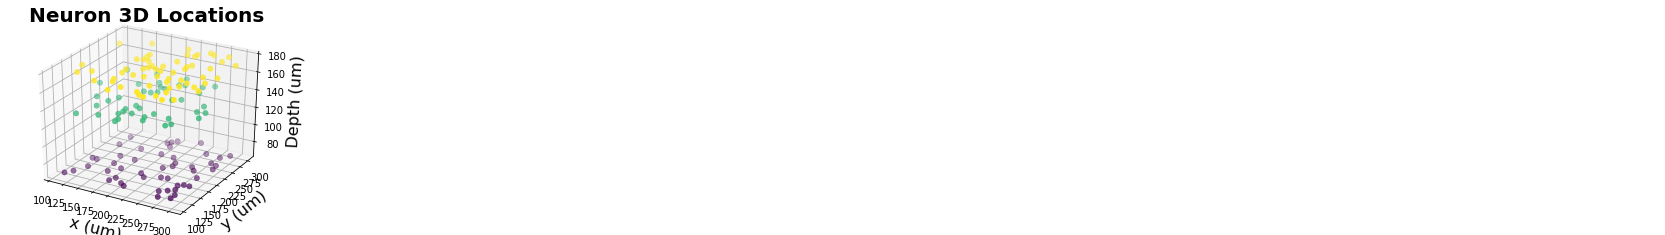

In [11]:
plt.rcParams['figure.figsize'] = [5, 4]
partial_spont0.display_neuron_3d()  # TODO: why is this so small???

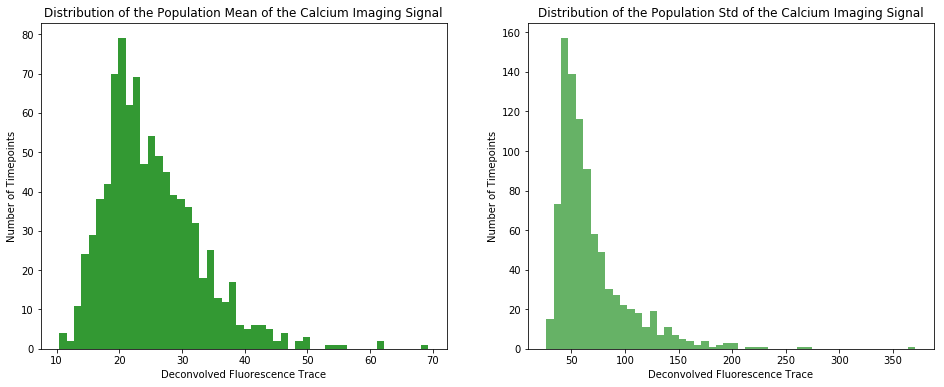

In [12]:
partial_spont0.display_fsp_distribution_all_time()

In [13]:
print(partial_spont0.run_speed.shape)
print(partial_spont0.pupil_area.shape)

(900, 1)
(900, 1)


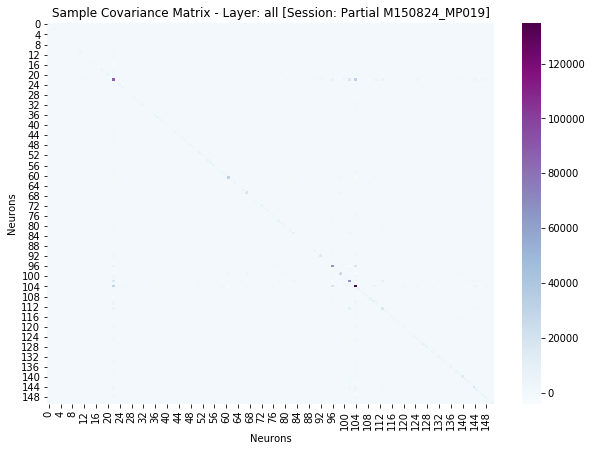

array([[ 1.38679964e+03, -4.35888946e+00, -6.83195529e+01, ...,
        -1.46440544e+01, -5.21664233e+01, -2.63390975e+01],
       [-4.35888946e+00,  3.64201155e+02, -7.18873005e+00, ...,
         5.01794704e+01, -2.19202334e+01,  3.70619574e+01],
       [-6.83195529e+01, -7.18873005e+00,  2.30805440e+03, ...,
        -7.73828884e+01, -4.45458740e+01,  2.01436622e+02],
       ...,
       [-1.46440544e+01,  5.01794704e+01, -7.73828884e+01, ...,
         6.16364691e+03, -1.64454126e-01,  2.51233473e+02],
       [-5.21664233e+01, -2.19202334e+01, -4.45458740e+01, ...,
        -1.64454126e-01,  1.93676103e+03,  1.05297427e+02],
       [-2.63390975e+01,  3.70619574e+01,  2.01436622e+02, ...,
         2.51233473e+02,  1.05297427e+02,  4.10962483e+03]])

In [16]:
partial_spont0.sample_covariance_matrix(display=True)

In [17]:
spont_data0.layer2neurons

{70: array([   0,    1,    2, ..., 1128, 1129, 1130]),
 105: array([1131, 1132, 1133, ..., 2311, 2312, 2313]),
 140: array([2314, 2315, 2316, ..., 3529, 3530, 3531]),
 175: array([3532, 3533, 3534, ..., 4850, 4851, 4852]),
 210: array([4853, 4854, 4855, ..., 6265, 6266, 6267]),
 245: array([6268, 6269, 6270, ..., 7736, 7737, 7738]),
 280: array([7739, 7740, 7741, ..., 9154, 9155, 9156]),
 315: array([ 9157,  9158,  9159, ..., 10594, 10595, 10596]),
 350: array([10597, 10598, 10599, ..., 11980, 11981, 11982])}